<a href="https://colab.research.google.com/github/ramin-nouri/sunram/blob/main/newcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai ipywidgets gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 97.6 MB/

In [2]:
!pip install nest_asyncio


In [3]:
!pip install imagecodecs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 38.1 MB/s eta 0:00:00


In [4]:
from fastai.vision.all import *
from fastdownload import download_url

In [5]:
import pandas as pd

# Load URLs from the CSV file
csv_file_path = '/content/zurich.csv'
url_df = pd.read_csv(csv_file_path, header=None, names=['url'])
image_urls = url_df['url'].tolist()


In [8]:
from fastai.vision.all import *
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import os
from concurrent.futures import ThreadPoolExecutor

# Function to download and compress an image, with error logging
def download_and_compress_image(url, idx, target_size=(224, 224), quality=85):
    save_dir = '/mnt/data/compressed_images'
    os.makedirs(save_dir, exist_ok=True)
    file_name = os.path.join(save_dir, f'image_{idx}.jpeg')

    try:
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img = img.resize(target_size)
            img_byte_arr = BytesIO()
            img.save(img_byte_arr, format='JPEG', quality=quality)
            with open(file_name, 'wb') as img_file:
                img_file.write(img_byte_arr.getvalue())
            return (url, "Success")
        else:
            return (url, f"Failed with status code {response.status_code}")
    except Exception as e:
        return (url, f"Error: {e}")



# Use ThreadPoolExecutor to download and compress images in parallel
results = []
with ThreadPoolExecutor(max_workers=10) as executor:
    futures = [executor.submit(download_and_compress_image, url, idx) for idx, url in enumerate(image_urls)]
    for future in futures:
        results.append(future.result())

# Filter out failed downloads
failed_downloads = [result for result in results if result[1] != "Success"]

print(f"Failed downloads: {failed_downloads}")


Failed downloads: []


In [ ]:
import requests
from PIL import Image
from io import BytesIO

def download_and_compress_image(url, target_size=(224, 224), quality=85):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.resize(target_size)
        img_byte_arr = BytesIO()
        img.save(img_byte_arr, format='JPEG', quality=quality)
        img_byte_arr = img_byte_arr.getvalue()
        return img_byte_arr
    except Exception as e:
        print(f"Error downloading or compressing {url}: {e}")
        return None

# Download and compress images
compressed_images = [download_and_compress_image(url) for url in image_urls]

In [ ]:
import os

# Directory to save images
save_dir = '/mnt/data/compressed_images'
os.makedirs(save_dir, exist_ok=True)

# Save images to the directory
for idx, img_data in enumerate(compressed_images):
    if img_data is not None:
        file_name = os.path.join(save_dir, f'image_{idx}.jpeg')
        with open(file_name, 'wb') as img_file:
            img_file.write(img_data)


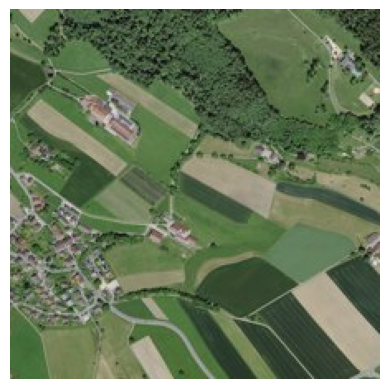

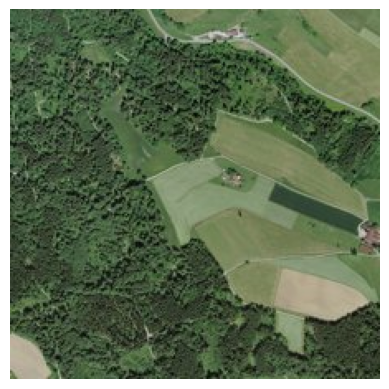

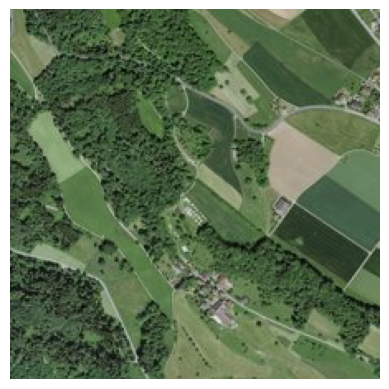

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and display an image
def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display the first few images
for i in range(3):
    display_image(f'/mnt/data/compressed_images/image_{i}.jpeg')


In [11]:
import zipfile
import os

# Path to the ZIP file and the directory where you want to extract it
zip_file_path = '/content/labled.zip'
extraction_directory = '/content/extracted_images'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_directory, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

print("Extraction Completed.")


Extraction Completed.


In [12]:
# List the first few files in the extraction directory
extracted_files = os.listdir(extraction_directory)
print("Extracted files:", extracted_files[:5])


Extracted files: ['PV01_325123_1204229.bmp', 'PV01_325199_1204170.bmp', 'PV01_325412_1205370_label.bmp', 'PV01_325563_1204534_label.bmp', 'PV01_325326_1205380.bmp']


In [13]:
import os

# Directory containing the extracted images
image_directory = '/content/extracted_images'

# Separating the raw images and their corresponding labels
raw_images = []
label_images = []

for filename in os.listdir(image_directory):
    if filename.endswith('_label.bmp'):
        label_images.append(filename)
    else:
        raw_images.append(filename)

# Just to verify
print("Raw images:", raw_images[:5])
print("Label images:", label_images[:5])


Raw images: ['PV01_325123_1204229.bmp', 'PV01_325199_1204170.bmp', 'PV01_325326_1205380.bmp', 'PV01_325331_1205372.bmp', 'PV01_325334_1203789.bmp']
Label images: ['PV01_325412_1205370_label.bmp', 'PV01_325563_1204534_label.bmp', 'PV01_325194_1204251_label.bmp', 'PV01_324972_1203801_label.bmp', 'PV01_325206_1204181_label.bmp']


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2]
)


In [15]:
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(224, 224)):
    image = img_to_array(load_img(image_path, target_size=target_size)) / 255.0
    return image

# Assuming extraction_directory is correctly set
preprocessed_images = [preprocess_image(os.path.join(extraction_directory, img)) for img in raw_images]
preprocessed_labels = [preprocess_image(os.path.join(extraction_directory, lbl)) for lbl in label_images]


In [16]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    preprocessed_images, preprocessed_labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.25, random_state=42)


In [17]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def unet_model(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # Contracting Path (Downsampling)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive Path (Upsampling)
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
import numpy as np

def preprocess_label(image_path, target_size=(224, 224)):
    image = img_to_array(load_img(image_path, target_size=target_size, color_mode='grayscale')) / 255.0
    return image

preprocessed_labels = np.array([preprocess_label(os.path.join(extraction_directory, f)) for f in label_images])
print("Label shape:", preprocessed_labels.shape)  # This should output (num_samples, 224, 224, 1)


Label shape: (665, 224, 224, 1)


In [20]:

train_images, val_images, train_labels, val_labels = train_test_split(
    preprocessed_images, preprocessed_labels, test_size=0.25, random_state=42)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create image data augmentation generators
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit methods
seed = 1
image_datagen.fit(train_images, augment=True, seed=seed)
mask_datagen.fit(train_labels, augment=True, seed=seed)


In [26]:
print(f"Number of training images: {len(train_images)}")


Number of training images: 498


In [27]:
batch_size = 32  # Adjust as necessary
steps_per_epoch = max(1, len(train_images) // batch_size)
print(f"Steps per epoch: {steps_per_epoch}")


Steps per epoch: 15


In [28]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of training labels: {len(train_labels)}")


Number of training images: 498
Number of training labels: 498


In [29]:
import numpy as np

train_images = np.array(train_images)
train_labels = np.array(train_labels)

print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)


Shape of train_images: (498, 224, 224, 3)
Shape of train_labels: (498, 224, 224, 1)


In [30]:
batch_size = 5  # or 3
steps_per_epoch = max(1, len(train_images) // batch_size)
print(f"Batch size: {batch_size}, Steps per epoch: {steps_per_epoch}")


Batch size: 5, Steps per epoch: 99


In [31]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)


In [32]:
print(f"Number of validation images: {len(val_images)}")
print(f"Number of validation labels: {len(val_labels)}")


Number of validation images: 167
Number of validation labels: 167


In [33]:
val_images = np.array(val_images)
val_labels = np.array(val_labels)

print("Shape of val_images:", val_images.shape)
print("Shape of val_labels:", val_labels.shape)


Shape of val_images: (167, 224, 224, 3)
Shape of val_labels: (167, 224, 224, 1)


In [34]:
history = model.fit(
    image_datagen.flow(train_images, train_labels, batch_size=batch_size, seed=seed),
    steps_per_epoch=steps_per_epoch,
    epochs=50,  # Adjust as necessary
    validation_data=(val_images, val_labels)
)


Epoch 1/50
99/99 [==============================] - 11s 112ms/step - loss: 0.5585 - accuracy: 0.7060 - val_loss: 0.5632 - val_accuracy: 0.6974
Epoch 2/50
99/99 [==============================] - 5s 52ms/step - loss: 0.5578 - accuracy: 0.7034 - val_loss: 0.5648 - val_accuracy: 0.6974
Epoch 3/50
99/99 [==============================] - 5s 53ms/step - loss: 0.5593 - accuracy: 0.7045 - val_loss: 0.5675 - val_accuracy: 0.6974
Epoch 4/50
99/99 [==============================] - 5s 55ms/step - loss: 0.5546 - accuracy: 0.7055 - val_loss: 0.5619 - val_accuracy: 0.6974
Epoch 5/50
99/99 [==============================] - 5s 54ms/step - loss: 0.5576 - accuracy: 0.7049 - val_loss: 0.5614 - val_accuracy: 0.6974
Epoch 6/50
99/99 [==============================] - 5s 55ms/step - loss: 0.5580 - accuracy: 0.7048 - val_loss: 0.5642 - val_accuracy: 0.6974
Epoch 7/50
99/99 [==============================] - 5s 53ms/step - loss: 0.5599 - accuracy: 0.7048 - val_loss: 0.5613 - val_accuracy: 0.6974
Epoch 8/50


In [37]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of test_images: (133, 224, 224, 3)
Shape of test_labels: (133, 224, 224, 3)


In [38]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


5/5 [==============================] - 1s 64ms/step - loss: 0.5570 - accuracy: 0.7019
Test Loss: 0.5570291876792908, Test Accuracy: 0.7019079327583313


In [39]:
model.save('my_model.h5')  # Saves the model for future use


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


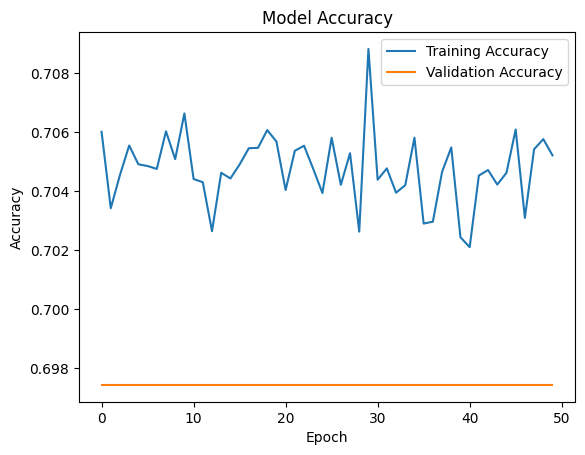

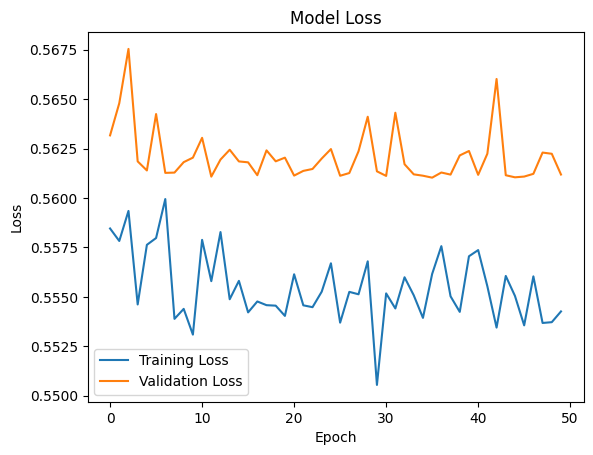

In [40]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


1/1 [==============================] - 0s 285ms/step


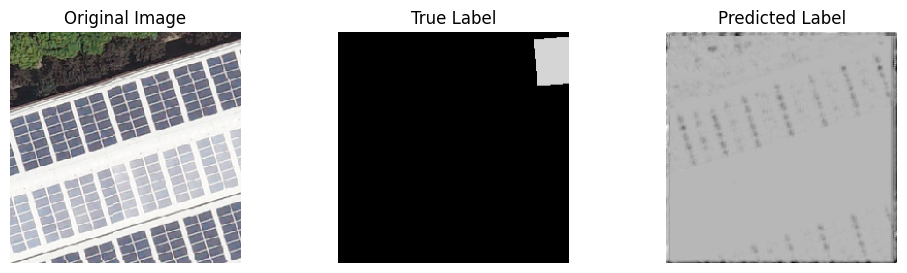

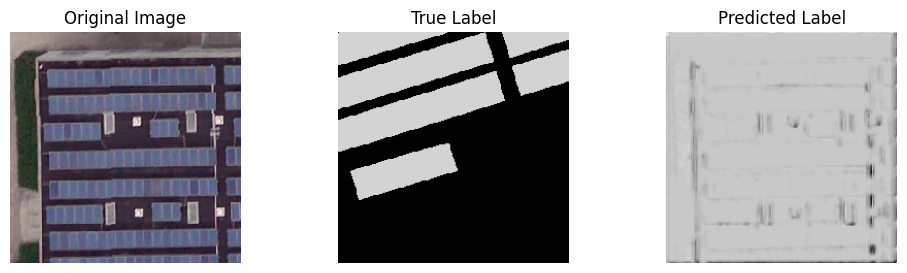

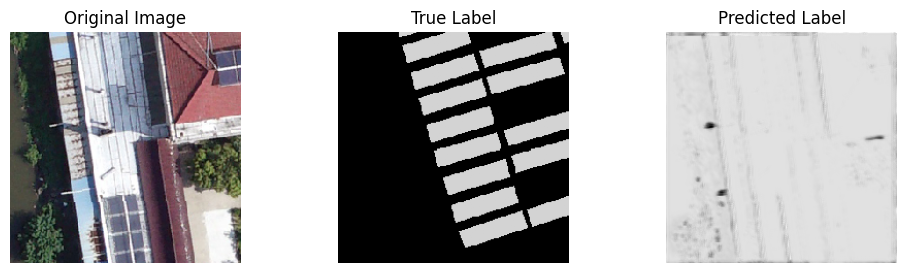

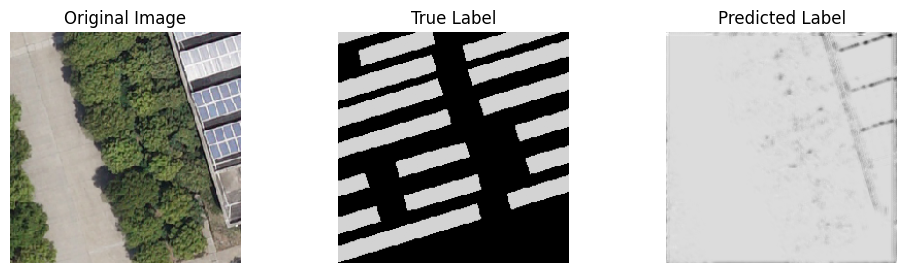

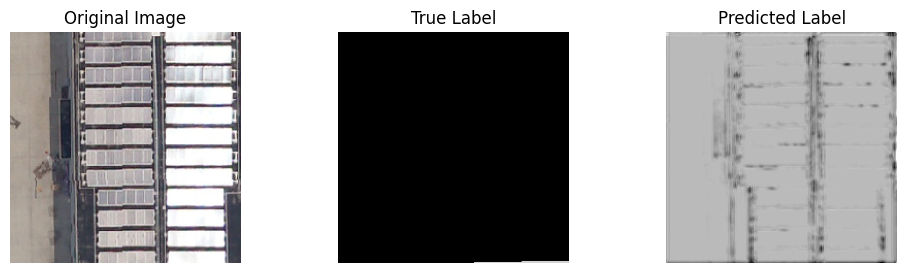

In [41]:
import matplotlib.pyplot as plt

# Select a few images from your test set
test_sample_images = test_images[:5]
test_sample_labels = test_labels[:5]

predicted_labels = model.predict(test_sample_images)

for i in range(len(test_sample_images)):
    plt.figure(figsize=(12, 3))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(test_sample_images[i])
    plt.title("Original Image")
    plt.axis('off')

    # Display true label (mask)
    plt.subplot(1, 3, 2)
    plt.imshow(test_sample_labels[i].squeeze(), cmap='gray')
    plt.title("True Label")
    plt.axis('off')

    # Display predicted label (mask)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_labels[i].squeeze(), cmap='gray')
    plt.title("Predicted Label")
    plt.axis('off')

    plt.show()


In [42]:
# Get the predictions from the model
predictions = model.predict(test_images)

# Check the shape of the predictions and the true labels
print("Predictions shape:", predictions.shape)
print("True labels shape:", test_labels.shape)

# Flatten the predictions and the true labels
y_pred = predictions.flatten()
y_true = test_labels.flatten()

# Apply a threshold to convert probabilities to binary values
y_pred = (y_pred > 0.5).astype(int)

# Verify that the flattened arrays have the same length
print("Flattened predictions length:", y_pred.shape)
print("Flattened true labels length:", y_true.shape)

# If the lengths match, calculate the metrics
if y_pred.shape == y_true.shape:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    iou = jaccard_score(y_true, y_pred)

    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, IoU: {iou}")
else:
    print("The predictions and true labels have different lengths.")


5/5 [==============================] - 0s 69ms/step
Predictions shape: (133, 224, 224, 1)
True labels shape: (133, 224, 224, 3)
Flattened predictions length: (6673408,)
Flattened true labels length: (20020224,)
The predictions and true labels have different lengths.


In [43]:
from tensorflow.keras.optimizers import Adam

# Example of trying a different learning rate
new_learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=new_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
data_gen_args = {
    'rotation_range': 10,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.1,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'vertical_flip': True,  # New augmentation
    'brightness_range': [0.8, 1.2],  # New augmentation
    'fill_mode': 'nearest'
}

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit methods
image_datagen.fit(train_images, augment=True, seed=seed)
mask_datagen.fit(train_labels, augment=True, seed=seed)


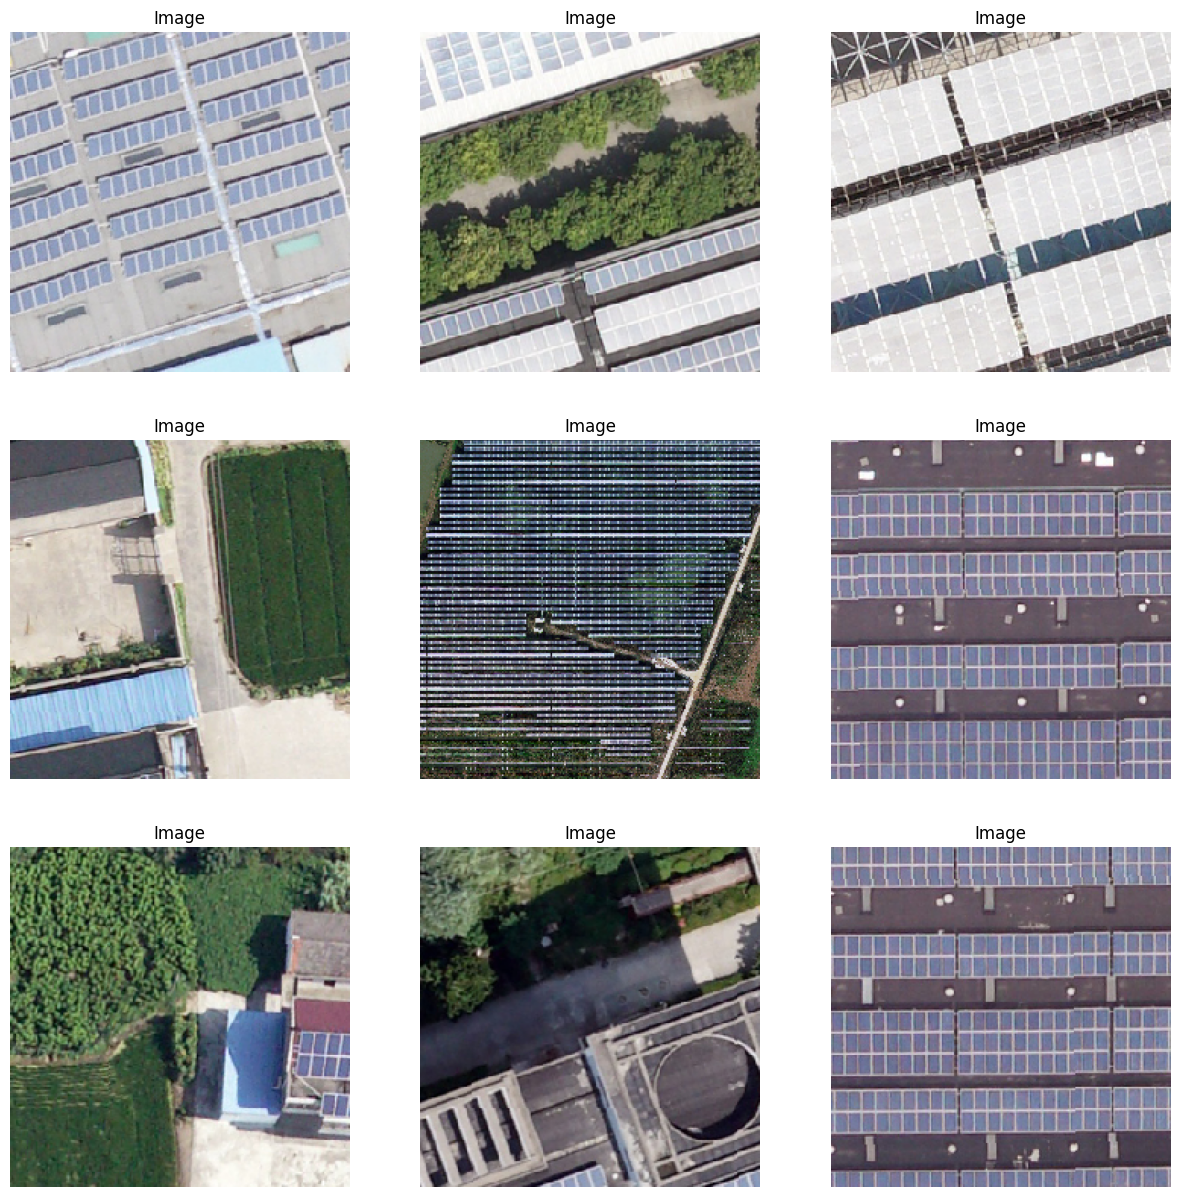

In [45]:
import matplotlib.pyplot as plt

# Assuming 'train_images' is your dataset of images
def plot_image_samples(images, titles, rows=3, cols=3, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    for i in range(1, cols * rows + 1):
        plt.subplot(rows, cols, i)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Plotting a sample of images
plot_image_samples(train_images, titles=["Image" for _ in train_images])


In [46]:
from tensorflow.keras.optimizers import Adam

# Example: trying different learning rates
learning_rates = [0.01, 0.001, 0.0001]
for lr in learning_rates:
    model = unet_model()
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    # Train your model
    history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(val_images, val_labels))

    # Optionally, you can evaluate the model here or save the training history for later analysis
    print(f"Training with learning rate: {lr}")
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/10
16/16 [==============================] - 26s 795ms/step - loss: 0.6220 - accuracy: 0.6811 - val_loss: 0.5713 - val_accuracy: 0.6974
Epoch 2/10
16/16 [==============================] - 5s 294ms/step - loss: 0.6022 - accuracy: 0.7017 - val_loss: 0.5640 - val_accuracy: 0.6974
Epoch 3/10
16/16 [==============================] - 5s 289ms/step - loss: 0.5590 - accuracy: 0.7048 - val_loss: 0.5641 - val_accuracy: 0.6974
Epoch 4/10
16/16 [==============================] - 5s 287ms/step - loss: 0.5581 - accuracy: 0.7048 - val_loss: 0.5659 - val_accuracy: 0.6974
Epoch 5/10
16/16 [==============================] - 5s 286ms/step - loss: 0.5586 - accuracy: 0.7048 - val_loss: 0.5621 - val_accuracy: 0.6974
Epoch 6/10
16/16 [==============================] - 5s 285ms/step - loss: 0.5570 - accuracy: 0.7048 - val_loss: 0.5662 - val_accuracy: 0.6974
Epoch 7/10
16/16 [==============================] - 4s 282ms/step - loss: 0.5576 - accuracy: 0.7048 - val_loss: 0.5612 - val_accuracy: 0.6974
Epoch

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

def simple_model(input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Assuming train_images, train_labels, val_images, val_labels are already defined

# Flatten the images for the simple dense network
train_images_flat = np.array([img.flatten() for img in train_images])
val_images_flat = np.array([img.flatten() for img in val_images])

# Function to reshape labels for binary classification
def reshape_labels(labels):
    reshaped = []
    for label in labels:
        # Flatten the label and use the majority class (0 or 1) as the label for the whole image
        majority_class = np.round(np.mean(label))
        reshaped.append(majority_class)
    return np.array(reshaped)

train_labels_flat = reshape_labels(train_labels)
val_labels_flat = reshape_labels(val_labels)

# Create and compile the model
input_shape = (train_images_flat.shape[1],)  # This is the flattened shape
baseline_model = simple_model(input_shape)
baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = baseline_model.fit(
    train_images_flat,
    train_labels_flat,
    batch_size=32,
    epochs=10,
    validation_data=(val_images_flat, val_labels_flat)
)

# Evaluate the model on the validation set
val_loss, val_accuracy = baseline_model.evaluate(val_images_flat, val_labels_flat)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


Epoch 1/10
16/16 [==============================] - 2s 40ms/step - loss: 27.2970 - accuracy: 0.7289 - val_loss: 13.2837 - val_accuracy: 0.8443
Epoch 2/10
16/16 [==============================] - 0s 18ms/step - loss: 5.7648 - accuracy: 0.8012 - val_loss: 0.9879 - val_accuracy: 0.2814
Epoch 3/10
16/16 [==============================] - 0s 19ms/step - loss: 1.2259 - accuracy: 0.7972 - val_loss: 0.9659 - val_accuracy: 0.8443
Epoch 4/10
16/16 [==============================] - 0s 18ms/step - loss: 0.5305 - accuracy: 0.8133 - val_loss: 0.6611 - val_accuracy: 0.8443
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 0.3482 - accuracy: 0.8795 - val_loss: 0.5510 - val_accuracy: 0.7725
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 0.3544 - accuracy: 0.8614 - val_loss: 0.7621 - val_accuracy: 0.8443
Epoch 7/10
16/16 [==============================] - 0s 18ms/step - loss: 0.3729 - accuracy: 0.8795 - val_loss: 0.4537 - val_accuracy: 0.8263
Epoch 8/10


1/1 [==============================] - 0s 247ms/step


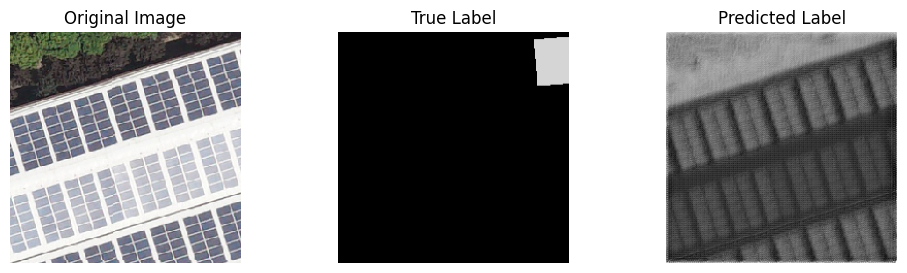

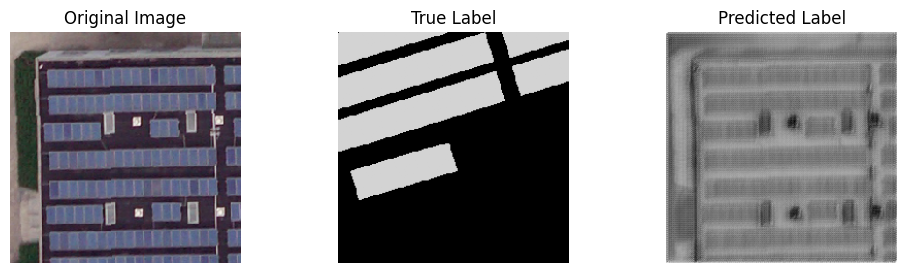

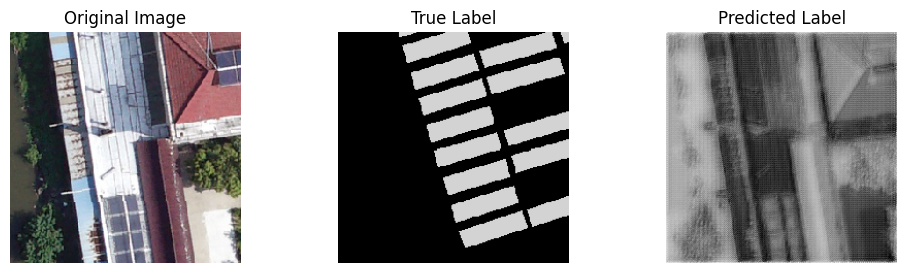

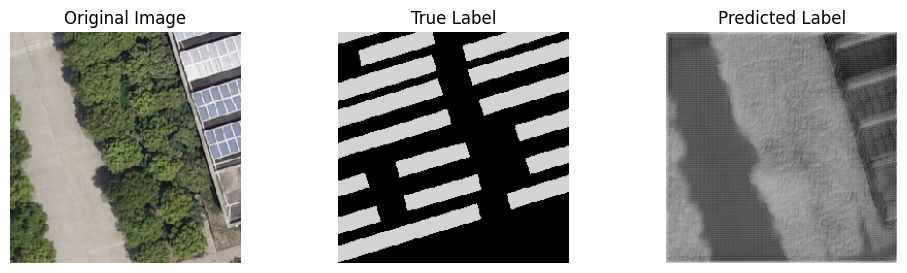

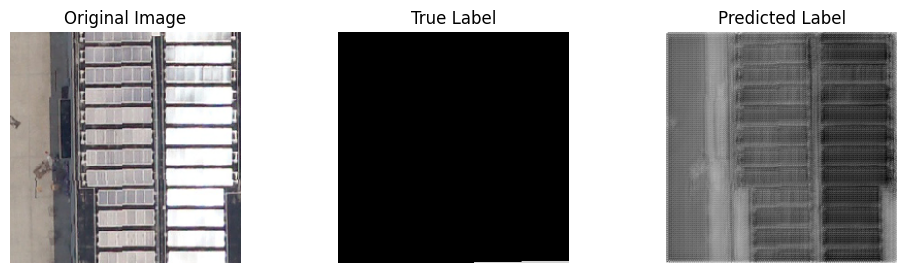

In [48]:
import matplotlib.pyplot as plt

# Select a few images from your test set
test_sample_images = test_images[:5]
test_sample_labels = test_labels[:5]

predicted_labels = model.predict(test_sample_images)

for i in range(len(test_sample_images)):
    plt.figure(figsize=(12, 3))

    # Display original image
    plt.subplot(1, 3, 1)
    plt.imshow(test_sample_images[i])
    plt.title("Original Image")
    plt.axis('off')

    # Display true label (mask)
    plt.subplot(1, 3, 2)
    plt.imshow(test_sample_labels[i].squeeze(), cmap='gray')
    plt.title("True Label")
    plt.axis('off')

    # Display predicted label (mask)
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_labels[i].squeeze(), cmap='gray')
    plt.title("Predicted Label")
    plt.axis('off')

    plt.show()


In [50]:
pip install gradio


In [ ]:
pip install --upgrade typing_extensions


In [51]:
pip install --upgrade gradio


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 

In [ ]:
import sys
print(sys.version)


In [ ]:
!pip install --force-reinstall gradio


In [53]:
import gradio as gr
import numpy as np

def predict_image(img):
    # Replace 'preprocess_image' with your actual preprocessing function
    processed_img = preprocess_image(img)
    prediction = model.predict(np.array([processed_img]))[0]
    return prediction

iface = gr.Interface(fn=predict_image, inputs=gr.inputs.Image(shape=(224, 224)), outputs='image')
iface.launch()


AttributeError: module 'gradio' has no attribute 'inputs'